In [2]:
from Functions import datapipeline
from Functions import filtering_function
from Functions import prediction_funtion
import os
import h5py
import numpy as np

In [2]:
BEGIN_LOCATION = 'FT SCOTT'
BEGIN_YEARMONTH = 201706
BEGIN_DAY = 17
BEGIN_TIME = 238

finding your file
File Found
698785 vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5 33
/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/data/raw/VIL_H5_Files/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
Testing data saved to: ./Intermediate_Files/
loading Model: gan_generator
Loading Data
(25, 384, 384, 13) (25, 384, 384, 12)


2022-03-09 20:37:01.728916: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-09 20:37:01.729103: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-09 20:37:02.108388: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1
(1, 384, 384, 12)
Saved Outputs


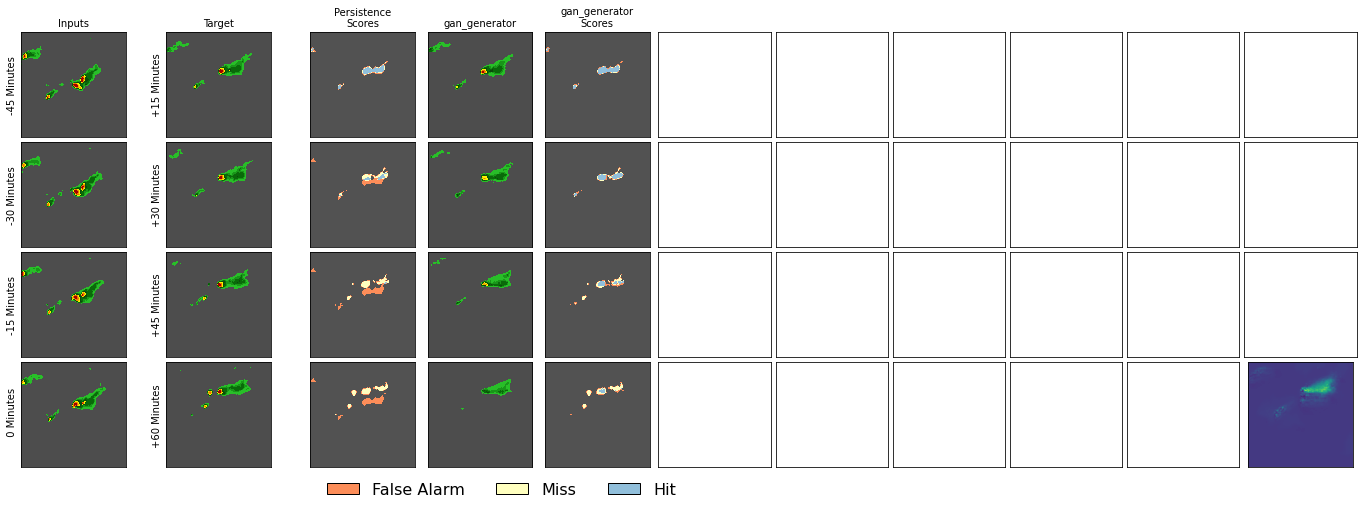

In [3]:
event_id,file_path,file_index = filtering_function.Filtering_function(BEGIN_LOCATION,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME)
print(event_id,file_path,file_index)
datapipeline.run(file_path,file_index)
prediction_funtion.predict("gan_generator",23)


In [4]:
datapipeline.run(file_path,file_index)

/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/data/raw/VIL_H5_Files/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
Testing data saved to: ./Intermediate_Files/


loading Model: gan_generator
Loading Data
(25, 384, 384, 13) (25, 384, 384, 12)


2022-03-09 18:38:46.897914: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-09 18:38:46.898128: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-09 18:38:47.238992: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1
(1, 384, 384, 12)
Saved Outputs


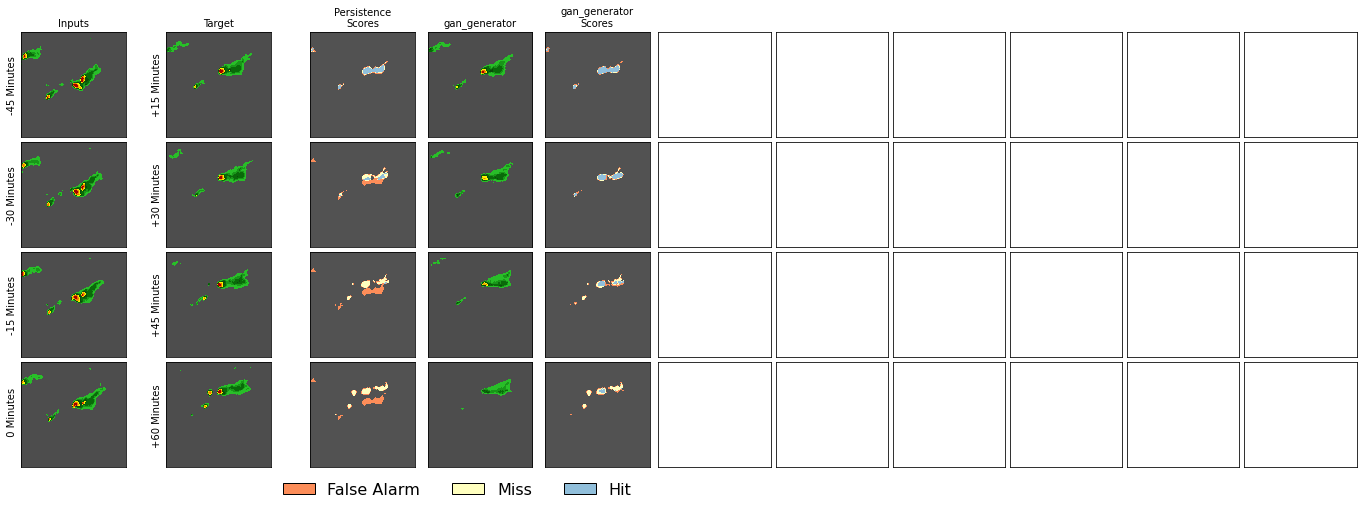

In [2]:
prediction_funtion.predict("gan_generator",23)

In [6]:
a = h5py.File('/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Intermediate_Files/data.h5','r')

In [36]:
a = h5py.File('/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Prediction/Array/Y_Pred.h5','r')

In [37]:
a['Pred'].shape

(1, 384, 384, 12)

In [22]:
print(a['Pred'].shape)

(1, 384, 384, 12)


In [46]:
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    print(frames)
    frame_one.save("my_awesome.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif("/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Images")

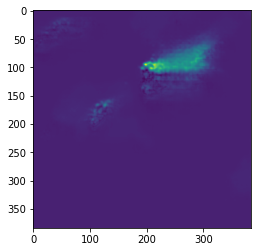

In [41]:
from matplotlib import pyplot as plt
img = []
for i in range(12):
    plt.imshow(a['Pred'][0][:,:,11])
    img.append(plt)

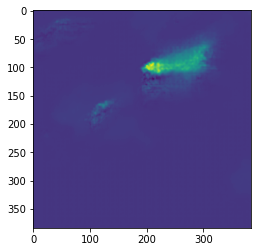

In [38]:
from matplotlib import pyplot as plt
plt.imshow(a['Pred'][0][:,:,10])

In [19]:
import requests
r = requests.get('http://127.0.0.1:8001/nowcast_results?begin_location=FT SCOTT&begin_year=201706&begin_month=17&begin_day=238&model=gan_generator&index=1')
print(r.content)

b'{"Image Path":"/Prediction"}'


In [35]:
import gcsfs
FS = gcsfs.GCSFileSystem(project="BigDataAssignment",
                            token="bigdata-assignment-340502-6247253b4b16.json")

FS.ls("gs://stormdata-assignment/Sevir/VIL/")

_request out of retries on exception: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')]
Traceback (most recent call last):
  File "/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/.venv/lib/python3.8/site-packages/aiohttp/connector.py", line 986, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)  # type: ignore[return-value]  # noqa
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1042, in create_connection
    transport, protocol = await self._create_connection_transport(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1072, in _create_connection_transport
    await waiter
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/sslp

ClientConnectorCertificateError: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')]

In [33]:
with FS.open("gs://stormdata-assignment/Sevir/VIL/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5", 'rb') as data_file:
    data = h5py.File(data_file, 'r')


_request out of retries on exception: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')]
Traceback (most recent call last):
  File "/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/.venv/lib/python3.8/site-packages/aiohttp/connector.py", line 986, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)  # type: ignore[return-value]  # noqa
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1042, in create_connection
    transport, protocol = await self._create_connection_transport(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1072, in _create_connection_transport
    await waiter
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/sslp

ClientConnectorCertificateError: Cannot connect to host storage.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')]